<a href="https://colab.research.google.com/github/Nirzaree/MLWithPython/blob/master/10_Density_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Concept

## Setup

* Importing basemap in colab https://community.insaid.co/hc/en-us/community/posts/360048243414-Installing-Importing-of-Basemap-in-Google-Colab

In [ ]:
# !apt-get install -q libgeos-3.5.0

Reading package lists...
Building dependency tree...
Reading state information...
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'


In [ ]:
# !apt-get install -q libgeos-dev

Reading package lists...
Building dependency tree...
Reading state information...
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
# !pip install -q https://github.com/matplotlib/basemap/archive/master.zip

     \ 153.2MB 2.0MB/s
     |████████████████████████████████| 6.6MB 14.3MB/s 
     |████████████████████████████████| 225kB 46.2MB/s 


In [ ]:
# !pip install -q pyproj==1.9.6

     |████████████████████████████████| 2.8MB 14.8MB/s 


In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer,make_blobs
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
from mpl_toolkits.basemap import Basemap

In [ ]:
np.set_printoptions(precision=2)

In [ ]:
# from google.colab import drive

In [ ]:
# drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# !cp '/content/drive/My Drive/Colab Notebooks/MLWithPython/ADSPYCourseStuff/fruit_data_with_colors.txt' .

## Case studies

### KDE 

* Check the beautiful explainer post on KDE at https://mathisonian.github.io/kde/ 

#### Why not histograms?

In [ ]:
def make_data(N,f=0.3,rseed=1):
  rand = np.random.RandomState(rseed)
  x = rand.randn(N)
  x[int(f*N):] += 5
  return x

In [ ]:
x = make_data(1000)

(array([0.01, 0.01, 0.02, 0.04, 0.07, 0.08, 0.13, 0.13, 0.1 , 0.09, 0.04,
        0.03, 0.03, 0.02, 0.05, 0.05, 0.08, 0.18, 0.24, 0.3 , 0.23, 0.26,
        0.19, 0.09, 0.06, 0.02, 0.01, 0.  , 0.  , 0.  ]),
 array([-2.79, -2.4 , -2.01, -1.62, -1.23, -0.83, -0.44, -0.05,  0.34,
         0.73,  1.12,  1.52,  1.91,  2.3 ,  2.69,  3.08,  3.47,  3.87,
         4.26,  4.65,  5.04,  5.43,  5.82,  6.22,  6.61,  7.  ,  7.39,
         7.78,  8.18,  8.57,  8.96]),
 <a list of 30 Patch objects>)

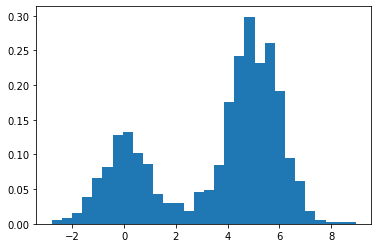

In [ ]:
plt.hist(x,bins=30,density=True)

Now consider a small sample size of the data: e.g. 20 points. 

(array([0.06, 0.17, 0.  , 0.06, 0.06, 0.06, 0.06, 0.33, 0.17, 0.17]),
 array([-2.3 , -1.4 , -0.49,  0.41,  1.32,  2.22,  3.13,  4.03,  4.94,
         5.84,  6.74]),
 <a list of 10 Patch objects>)

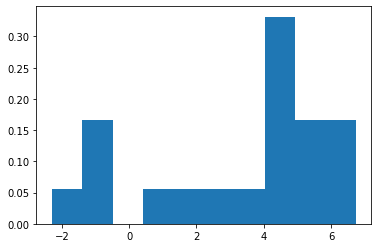

In [ ]:
x = make_data(20)
plt.hist(x,density=True)

In [ ]:
bins = np.linspace(-5,10,10)
print("Consider the following cluster centers")
print("{}".format(bins))
print("Bin width = {:.2f}".format(np.diff(bins)[0]))

Consider the following cluster centers
[-5.   -3.33 -1.67  0.    1.67  3.33  5.    6.67  8.33 10.  ]
Bin width = 1.67


(array([0.  , 0.03, 0.09, 0.06, 0.03, 0.21, 0.15, 0.03, 0.  ]),
 array([-5.  , -3.33, -1.67,  0.  ,  1.67,  3.33,  5.  ,  6.67,  8.33,
        10.  ]),
 <a list of 9 Patch objects>)

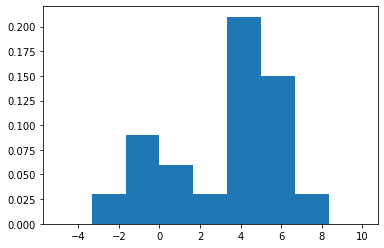

In [ ]:
plt.hist(x,bins=bins,density=True)

Looks ok. Now consider the case where the bins are at slightly different locations. 

In [ ]:
bins = np.linspace(-5,10,10) + 0.6
print("Consider the following cluster centers")
print("{}".format(bins))
print("Bin width = {:.2f}".format(np.diff(bins)[0]))

Consider the following cluster centers
[-4.4  -2.73 -1.07  0.6   2.27  3.93  5.6   7.27  8.93 10.6 ]
Bin width = 1.67


(array([0.  , 0.06, 0.06, 0.06, 0.06, 0.27, 0.09, 0.  , 0.  ]),
 array([-4.4 , -2.73, -1.07,  0.6 ,  2.27,  3.93,  5.6 ,  7.27,  8.93,
        10.6 ]),
 <a list of 9 Patch objects>)

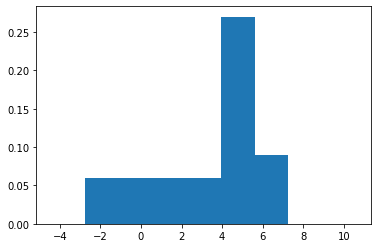

In [ ]:
plt.hist(x,bins=bins,density=True)

When the dataset is small, the choice of bin size and the location can impact the histogram a lot as seen in the case above when moving the bin centers and obtaining completely different histograms. 

Now instead of aligning the blocks to the bins, we align them to the data points themselves. 

In [ ]:
yval = pd.Series(0,index=np.linspace(-5,10,2000))


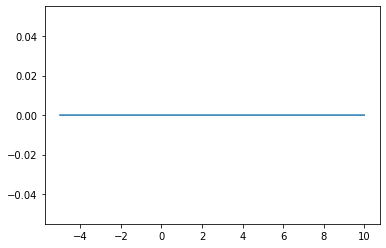

In [ ]:
plt.plot(yval)

In [ ]:
for xval in x:
  yval[]

In [ ]:
x[0]

1.6243453636632417

In [ ]:
yval.loc(200)

ValueError: ignored

In [ ]:
x_d = np.linspace(-4,8,10)
density = sum(np.abs(x_i - x_d) < 0.5 for x_i in x)

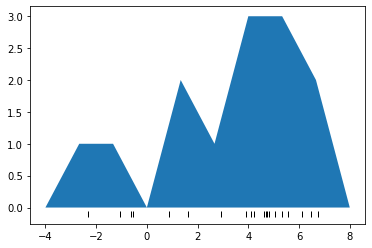

In [ ]:
plt.fill_between(x_d,density)
plt.plot(x,np.full_like(x,-0.1),'|k',markeredgewidth=1)

* New functions learnt:
  * plt.fill_between
  * np.full_like


In [ ]:
np.full_like(x,-0.1)

array([-0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1,
       -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1])

In [ ]:
from sklearn.neighbors import KernelDensity

In [ ]:
kde = KernelDensity(bandwidth=)

In [ ]:
kde.fit(x[:,None])

KernelDensity(algorithm='auto', atol=0, bandwidth=1.0, breadth_first=True,
              kernel='gaussian', leaf_size=40, metric='euclidean',
              metric_params=None, rtol=0)

In [ ]:
kdescores = kde.score_samples(x[:,None])

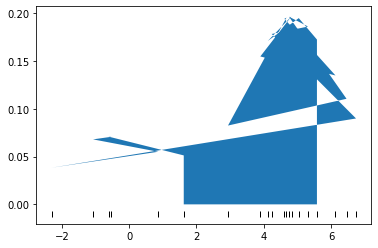

In [ ]:
plt.fill_between(x,np.exp(kdescores))
plt.plot(x,np.full_like(x,-0.01),'|k',)

* Reference: https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html

### KDE on synthetic data

### KDE based heatmap on Geographic data

In [ ]:
from sklearn.datasets import fetch_species_distributions

In [ ]:
from sklearn.datasets.species_distributions import construct_grids

In [ ]:
SpeciesData = fetch_species_distributions()

In [ ]:
# SpeciesData
type(SpeciesData)

sklearn.utils.Bunch

In [ ]:
latlon = np.vstack([SpeciesData.train['dd lat'],
                   SpeciesData.train['dd long']]).T

In [ ]:
np.unique(SpeciesData.train['species'])

array([b'bradypus_variegatus', b'bradypus_variegatus_0',
       b'bradypus_variegatus_1', b'bradypus_variegatus_2',
       b'bradypus_variegatus_3', b'bradypus_variegatus_4',
       b'bradypus_variegatus_5', b'bradypus_variegatus_6',
       b'bradypus_variegatus_7', b'bradypus_variegatus_8',
       b'bradypus_variegatus_9', b'microryzomys_minutus',
       b'microryzomys_minutus_0', b'microryzomys_minutus_1',
       b'microryzomys_minutus_2', b'microryzomys_minutus_3',
       b'microryzomys_minutus_4', b'microryzomys_minutus_5',
       b'microryzomys_minutus_6', b'microryzomys_minutus_7',
       b'microryzomys_minutus_8', b'microryzomys_minutus_9'], dtype='|S22')

* We convert the various labels within the 2 species to just the main species labels. 

* However the species data is of bytes type, so we decode it to ascii and then map the data to 2 categories

In [ ]:
species = np.array(['micro' in x.decode('ascii') for x in SpeciesData.train['species']],dtype='int')

In [ ]:
np.unique(species)

array([0, 1])

In [ ]:
x_grid,y_grid = construct_grids(SpeciesData)

In [ ]:
print(x_grid.shape)
print(y_grid.shape)

(1212,)
(1592,)


In [ ]:
m = Basemap(llcrnrlon=x_grid.min(),urcrnrlon=x_grid.max(),
            llcrnrlat=y_grid.min(), urcrnrlat = y_grid.max())

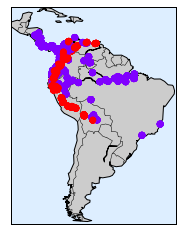

In [ ]:
m.drawmapboundary(fill_color='#DDEEFF')
m.fillcontinents()
m.drawcountries(zorder=2)
m.drawcoastlines(zorder=2)

#plot locations
m.scatter(latlon[:,1],latlon[:,0],
          c=species,
          zorder=3,
          cmap='rainbow',
          latlon=True)

* The raw data plot doesnt give a good idea about the density of distribution of the species across the locations. 

* We now plot kde of the data on the map

In [ ]:
len(latlon)

1624

In [ ]:
## Species 1: 

kde = KernelDensity(
    bandwidth=0.3,
    metric='haversine'
)
kde.fit(latlon[species == 0])


KernelDensity(algorithm='auto', atol=0, bandwidth=0.3, breadth_first=True,
              kernel='gaussian', leaf_size=40, metric='haversine',
              metric_params=None, rtol=0)

* Defining land areas  

In [ ]:
 SpeciesData.coverages.shape

(14, 1592, 1212)

In [ ]:
 SpeciesData.coverages[6].shape

(1592, 1212)

In [ ]:
landreference = SpeciesData.coverages[6][::5,::5]

Flatten the array

In [ ]:
landreference.shape

(319, 243)

In [ ]:
landmask = (landreference > -9999).ravel()

In [ ]:
latlon.shape

(1624, 2)

In [ ]:
m = Basemap(llcrnrlon=x_grid.min(),urcrnrlon=x_grid.max(),
            llcrnrlat=y_grid.min(), urcrnrlat = y_grid.max())
m.drawmapboundary(fill_color='#DDEEFF')
m.fillcontinents()
m.drawcountries(zorder=2)
m.drawcoastlines(zorder=2)

#plot locations
m.scatter(kde[:,1],kde[:,0],
          c=species,
          zorder=3,
          cmap='rainbow',
          latlon=True)

## References & further reading:
Reading:

1. KDE Reading: https://homepages.inf.ed.ac.uk/rbf/CVonline/LOCAL_COPIES/AV0405/MISHRA/kde.html

References:
1. Applied Data Science in Python Course - Coursera



